In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
data=pd.read_csv('textResponses.csv')

In [4]:
#len(data['Sample Name'].value_counts())

In [5]:
#new_data=data.copy()
useful_col=[]
for temp_col in data.columns:
    if len(data[temp_col].value_counts())>1:
        #print(temp_col)
        useful_col=useful_col+[(temp_col)]
data=data[useful_col]
data.head()

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,KC (Unique-step),School,Class,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time)
0,196,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,132.5,NaN,Show what you know A,Assessment_A,5,...,KC1147,Collaboration at Montour School District,Deley,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC
1,197,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,581,NaN,Show what you know A,Assessment_A,6,...,KC2168,Collaboration at Montour School District,Deley,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC
2,723,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,15.75,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,1a,...,KC644,Collaboration at Montour School District,Ewonce,"0,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC
3,758,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,0.333,NaN,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,2a,...,KC3056,Collaboration at Montour School District,Ewonce,"1,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC
4,801,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,11,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,3a,...,KC1749,Collaboration at Montour School District,Ewonce,"1,1,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC


In [6]:
data.to_pickle('cleaned_text.pkl')

In [7]:
all_text=''
for temp_text in data.Input:
    all_text=all_text+str(temp_text)
all_text

'no, because you don\'t change the denominater so this why this answer is wrong.I do not know this answer.Frist you need to double the denometor then do the same to the numrotorFirst, multiply the denominater by two then do the same to the numeraterfirst muply 8 by 2 then do the same to the numratorfirst mutly the denomtor by 2 then do the same for the numoratorFirst muptly the denomator by 2 and do rhe same to the numratorHe needs to find the least common denoiminator so they will both be equal. He also needs to find they multiples and factors.Next time, Olivia tries to find the least common denominator, she needs to look at her numbers more carefully.  She had the 1 and the 7 mixed up.Next time, Kaitie needs to compare 12 and 8 with the factors and multiples of 8 and 12 and find there simallarities.Next time Ryan needs to try more than just one combination.Next time, Matt needs to go over his facts again because all of them were incorrect.Next time, Brad needs to look at the fraction

In [8]:
data['Outcome'].value_counts()

CORRECT      7256
INCORRECT      73
Name: Outcome, dtype: int64

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
tokens = word_tokenize(str(all_text))
stop_words = set(stopwords.words('english'))
filtered_words = [w.lower() for w in tokens if not w in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
filtered_text=str(filtered_words)

In [11]:
filtered_text=''
for word in filtered_words:
    filtered_text=filtered_text+word+" "

In [12]:
filtered_text

", n't change denominater answer wrong.i know answer.frist need double denometor numrotorfirst , multiply denominater two numeraterfirst muply 8 2 numratorfirst mutly denomtor 2 numoratorfirst muptly denomator 2 rhe numratorhe needs find least common denoiminator equal . he also needs find multiples factors.next time , olivia tries find least common denominator , needs look numbers carefully . she 1 7 mixed up.next time , kaitie needs compare 12 8 factors multiples 8 12 find simallarities.next time ryan needs try one combination.next time , matt needs go facts incorrect.next time , brad needs look fractions top needs compare.since 15 9 divisible , correct answer 3 divisible 15 9.sally largest number goes denominators . sally needs find fact families.next time , lester needs know smaller fraction greater is.jimmy needs know thing lester needed learn . that larger fraction smaller amount.kima 2/4 equal 1/2 4/8 like 7/8 2/4.leslie study facts know likely get common denominator right.i kno

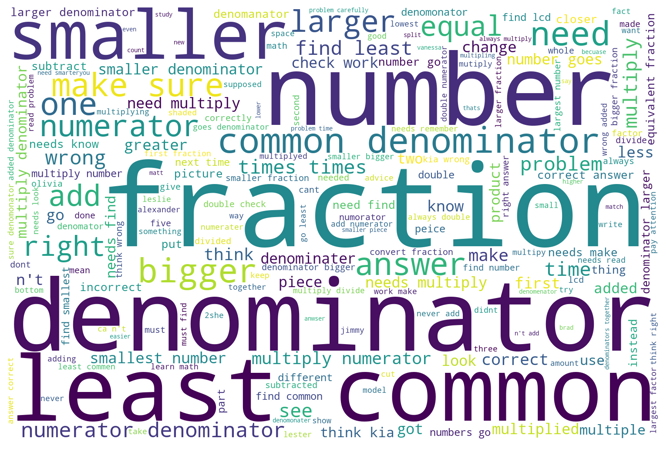

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(filtered_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

In [14]:
grade_data=pd.read_csv('textResponses_graded.csv')
grade_data=grade_data.iloc[:1451]

In [16]:
good_data=grade_data[grade_data.correctness==1]
bad_data=grade_data[grade_data.correctness==0]
good_data.head()

,Transaction Id,Anon Student Id,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,Problem Start Time,Step Name,Attempt At Step,Is Last Attempt,Input,correctness,answerType
0,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,Show what you know A,Assessment_A,5,1,5/2/16 12:22,responseA0001 UpdateTextArea,1,1,"no, because you don't change the denominater s...",1,p
4,e136fcb1272a730809cf6248134c28be,Stu_0479dc58fcc9d95f20f7396a10885619,S0c19e139f5bca05f25156309d670978d,5/20/16 9:03,America/New_York,96.5,Show what you learned A,Assessment_A,5,1,5/20/16 9:00,responseA0001 UpdateTextArea,1,1,"She is wrong because, first she didn't find a ...",1,p
5,d54ea501a8d5eb573dfe242be809c9d7,Stu_049d4b0e20a592319973093bdf412b18,S4967155914b09be44306146c0990b267,5/6/16 11:15,America/New_York,191,Show what you learned A,Assessment_A,5,1,5/6/16 11:09,responseA0001 UpdateTextArea,1,1,She did not add them correctly. She first need...,1,p
6,abab264a844b1a60f63b82d466df3b84,Stu_04dcb6afb01f3e5974a34f1e45a4c512,S4e70b11edac399518be4c47d4df0660f,5/9/16 9:28,America/New_York,73,Show what you know A,Assessment_A,5,1,5/9/16 9:26,responseA0001 UpdateTextArea,1,1,she is wrong because she doesn't have the lea...,1,p
9,d7352ef4e2480f5d4a0b39eabd40e9c9,Stu_075a11e1b4fbee4969b0b0146a2ffec4,S074ee41ea27125b94db8c22ad6338376,5/13/16 13:27,America/New_York,4.5,Show what you learned A,Assessment_A,5,1,5/13/16 13:26,responseA0001 UpdateTextArea,2,1,you are not supposed to add the denominators,1,p


In [21]:
grade_data.answerType.value_counts()

p     888
c     267
n     143
u      75
v      74
c       1
Name: answerType, dtype: int64

In [22]:
p_data=grade_data[grade_data.answerType=='p']
c_data=grade_data[grade_data.answerType=='c']
n_data=grade_data[grade_data.answerType=='n']
u_data=grade_data[grade_data.answerType=='u']
v_data=grade_data[grade_data.answerType=='v']

In [14]:
data['Student Response Subtype'].value_counts()

Student1    959
Student2    853
Student3      2
Name: Student Response Subtype, dtype: int64

In [17]:
def get_word_tokens(df):
    temp_all_text=''
    for temp_text in df.Input:
        temp_all_text=temp_all_text+str(temp_text)
    temp_tokens = word_tokenize(str(temp_all_text))
    stop_words = set(stopwords.words('english'))
    #temp_filtered_words = [w.lower() for w in temp_tokens if not w in stop_words]
    temp_filtered_words = [w.lower() for w in temp_tokens ]
    temp_filtered_text=''
    for word in temp_filtered_words:
        temp_filtered_text=temp_filtered_text+word+" "    
    return temp_filtered_text

In [34]:
good_text, bad_text= get_word_tokens(good_data),get_word_tokens(bad_data)
p_text, c_text, n_text, u_text, v_text = get_word_tokens(p_data),get_word_tokens(c_data), get_word_tokens(n_data),get_word_tokens(u_data),get_word_tokens(v_data)

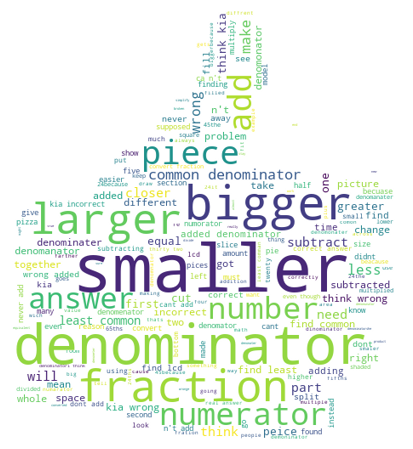

In [19]:

good_mask=imageio.imread('mask/'+'good.jpg')
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2, mask=good_mask).generate(good_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

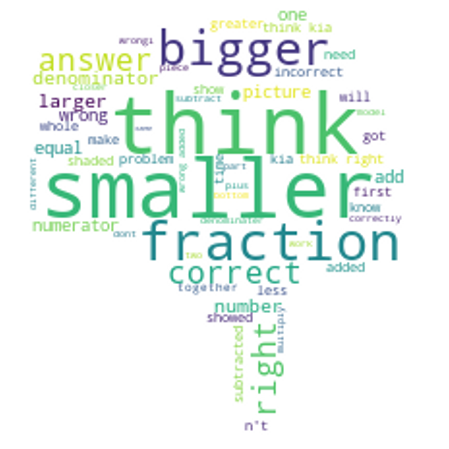

In [20]:
bad_mask=imageio.imread('mask/'+'bad.jpg')
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2, mask=bad_mask).generate(bad_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

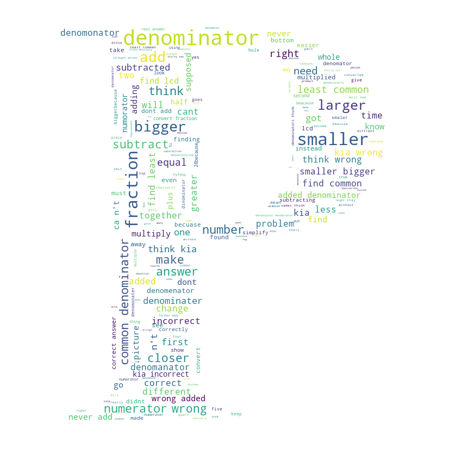

In [45]:
p_mask=imageio.imread('mask/'+'p.jpg')
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2, mask=p_mask).generate(p_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

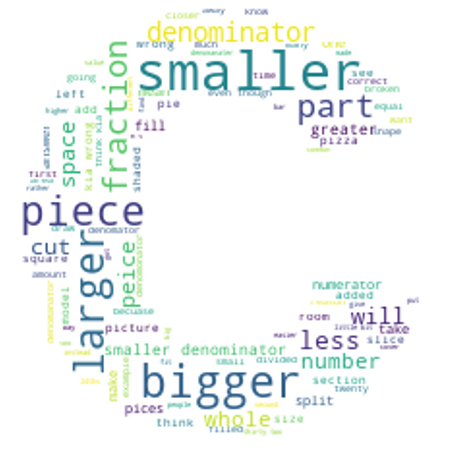

In [47]:
c_mask=imageio.imread('mask/'+'c.jpg')
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2, mask=c_mask).generate(c_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

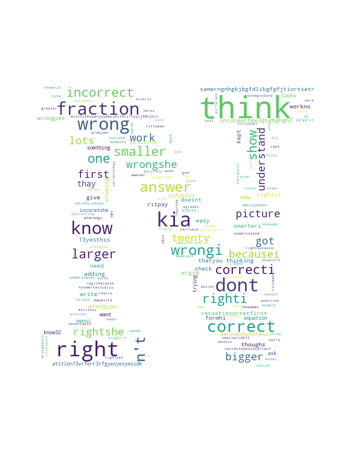

In [48]:
n_mask=imageio.imread('mask/'+'n.jpg')
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2, mask=n_mask).generate(n_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

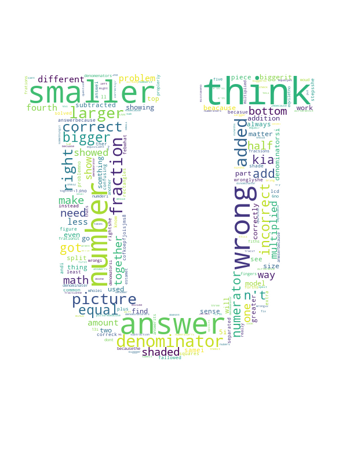

In [52]:
u_mask=imageio.imread('mask/'+'u.jpg')
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2, mask=u_mask).generate(u_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

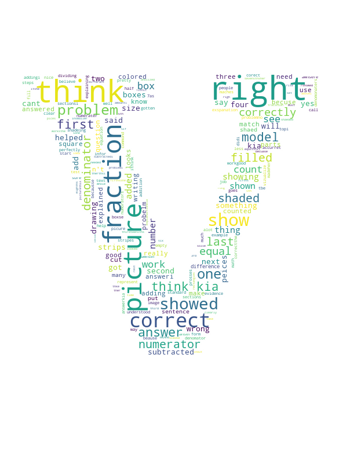

In [50]:
v_mask=imageio.imread('mask/'+'v.jpg')
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2, mask=v_mask).generate(v_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

In [23]:
def plot_most_frequent_words(word_freq,num_words=20,position=-20):
    words_to_plot=word_freq.most_common(num_words)
    temp_count=[temp[1] for temp in words_to_plot]
    temp_word=[temp[0] for temp in words_to_plot]
    fig,ax = plt.subplots(1,1,figsize=(15, 6))
    rect=ax.bar(range(num_words), temp_count,tick_label='')
    for i in range(num_words):
        ax.text(i,position,temp_word[i],rotation=90)
    ax.set_xlabel(str(num_words)+' most frequent words')
    ax.set_ylabel('frequency of words')

In [24]:
from nltk.probability import FreqDist
good_word_freq = FreqDist(word_tokenize(good_text))
good_word_freq

FreqDist({'the': 1400, 'is': 1155, 'because': 537, 'to': 476, 'than': 463, 'you': 409, 'smaller': 365, 'and': 351, '.': 346, 'denominator': 307, ...})

In [25]:
good_word_freq.most_common(10)[0][0]

'the'

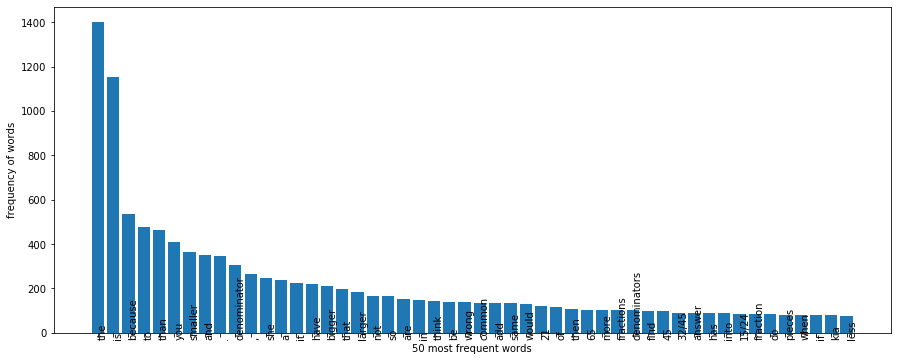

In [26]:
plot_most_frequent_words(good_word_freq,num_words=50)

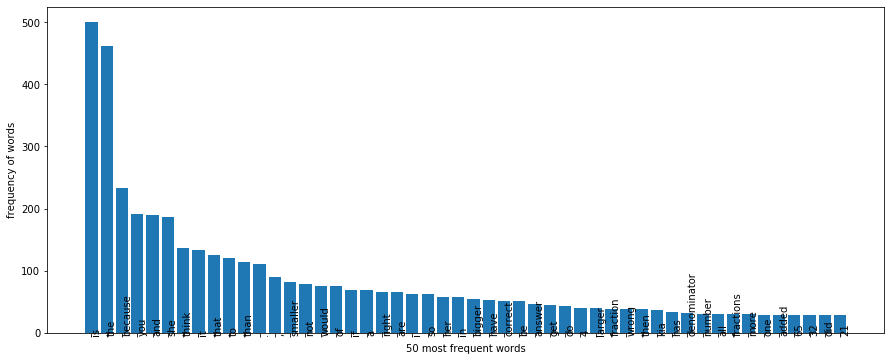

In [27]:
bad_word_freq = FreqDist(word_tokenize(bad_text))
plot_most_frequent_words(bad_word_freq,num_words=50,position=-1)

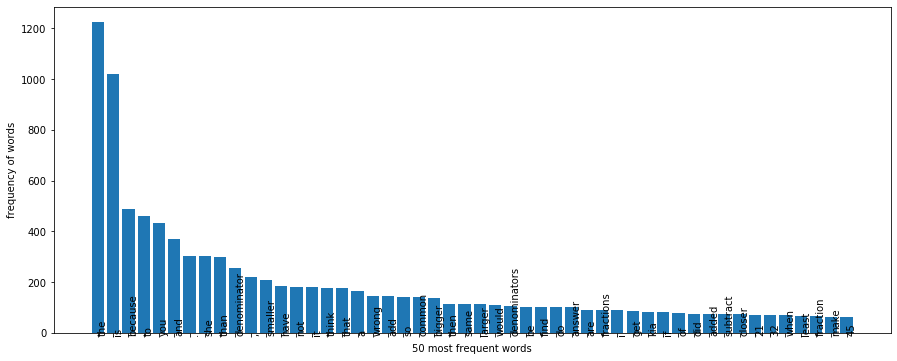

In [35]:
p_word_freq = FreqDist(word_tokenize(p_text))
plot_most_frequent_words(p_word_freq,num_words=50,position=-1)

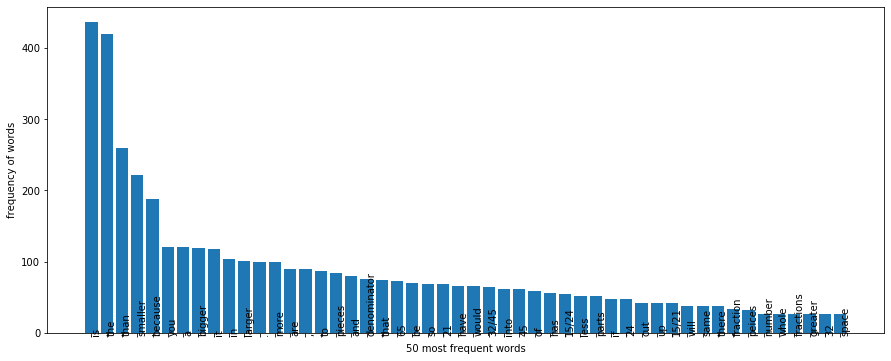

In [36]:
c_word_freq = FreqDist(word_tokenize(c_text))
plot_most_frequent_words(c_word_freq,num_words=50,position=-1)

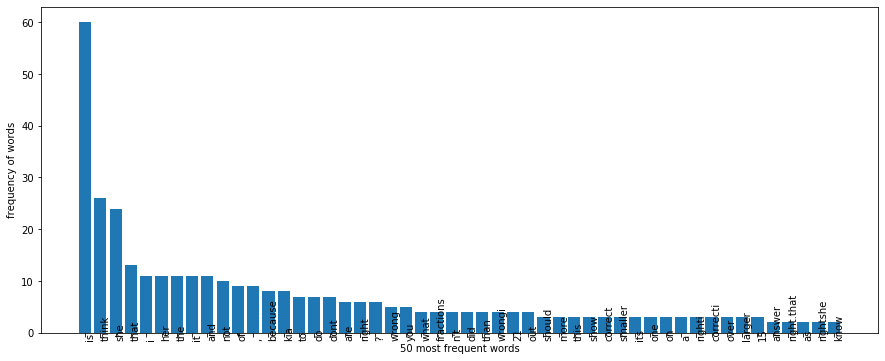

In [37]:
n_word_freq = FreqDist(word_tokenize(n_text))
plot_most_frequent_words(n_word_freq,num_words=50,position=-1)

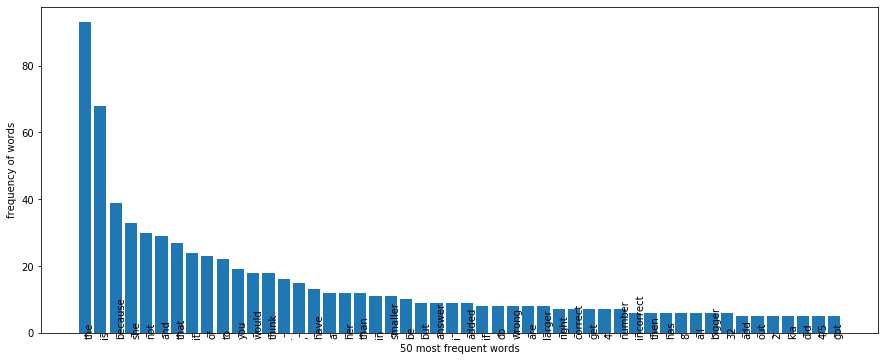

In [38]:
u_word_freq = FreqDist(word_tokenize(u_text))
plot_most_frequent_words(u_word_freq,num_words=50,position=-1)

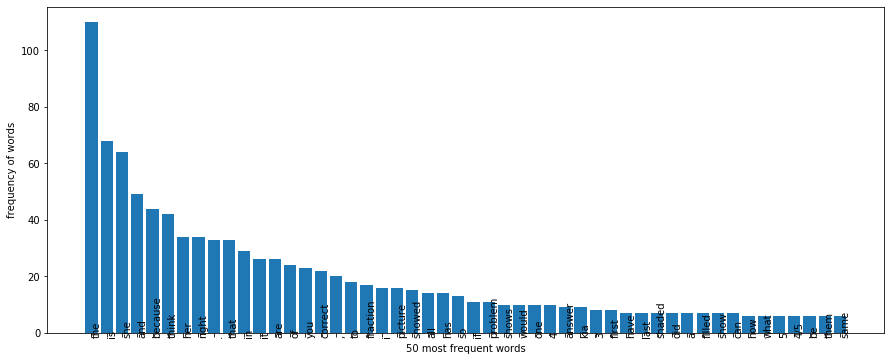

In [39]:
v_word_freq = FreqDist(word_tokenize(v_text))
plot_most_frequent_words(v_word_freq,num_words=50,position=-1)

In [28]:
text = 'vote to choose a particular man or a group (party) to represent them in parliament'
#Tokenize the text
nltk.download('averaged_perceptron_tagger')
tex = word_tokenize(text)
for token in tex:
    print(nltk.pos_tag([token]))

[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('man', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('parliament', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
def get_tagging_statistics(text):
    temp_tex = word_tokenize(text)
    tags=[]
    tag_stat={}
    for temp_token in temp_tex:
        temp_tag=nltk.pos_tag([temp_token])
        try:
            tag_stat[temp_tag[0][1]]+=1
        except:
            tag_stat[temp_tag[0][1]]=1
    return tag_stat


In [30]:
def plot_text_tagging(text_dict,position=-20):
    temp_list=sorted(text_dict.items(), key=lambda item: item[1], reverse=True)
    #temp_list=list(temp_dict.items())
    temp_count=[temp[1] for temp in temp_list]
    temp_tags=[temp[0] for temp in temp_list]
    fig,ax = plt.subplots(1,1,figsize=(15, 6))
    rect=ax.bar(range(len(temp_tags)), temp_count,tick_label='')
    for i in range(len(temp_tags)):
        ax.text(i,position,temp_tags[i],rotation=90)
    ax.set_xlabel('tags')
    ax.set_ylabel('frequency of tags')
    

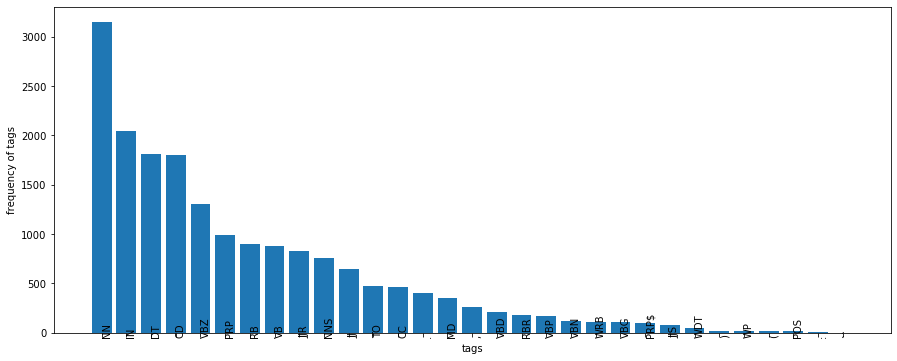

In [31]:
good_tag_stat=get_tagging_statistics(good_text)
plot_text_tagging(good_tag_stat,position=-30)

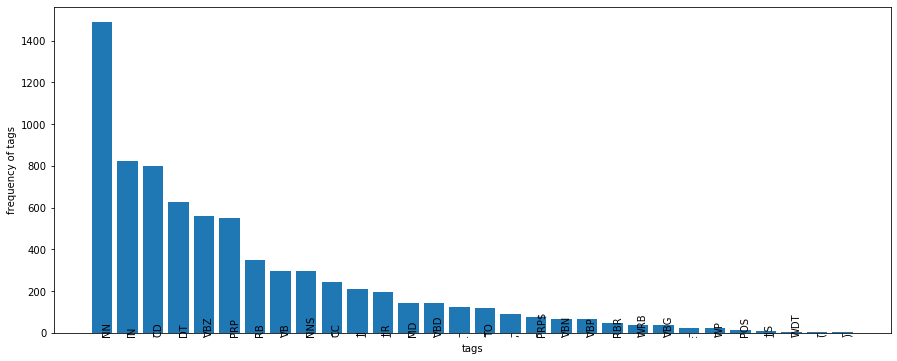

In [32]:
bad_tag_stat=get_tagging_statistics(bad_text)
plot_text_tagging(bad_tag_stat,position=-10)

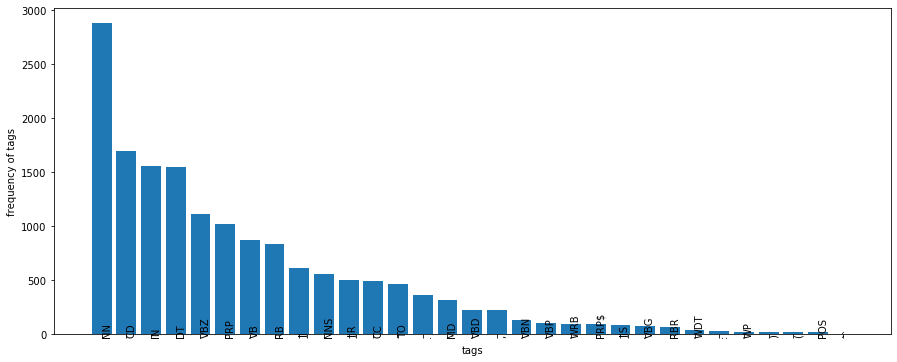

In [40]:
p_tag_stat=get_tagging_statistics(p_text)
plot_text_tagging(p_tag_stat,position=-10)

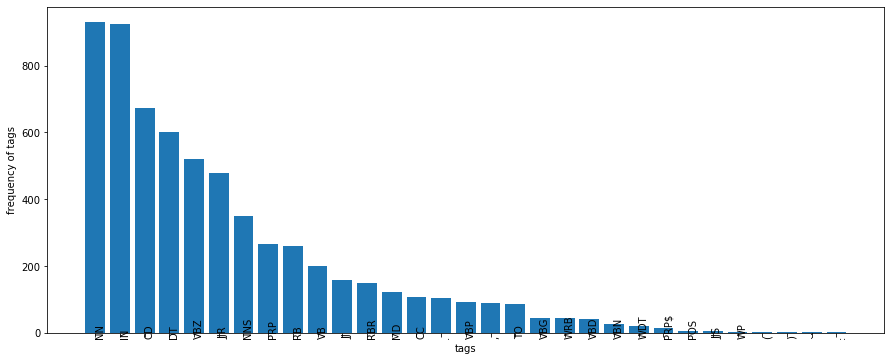

In [41]:
c_tag_stat=get_tagging_statistics(c_text)
plot_text_tagging(c_tag_stat,position=-10)

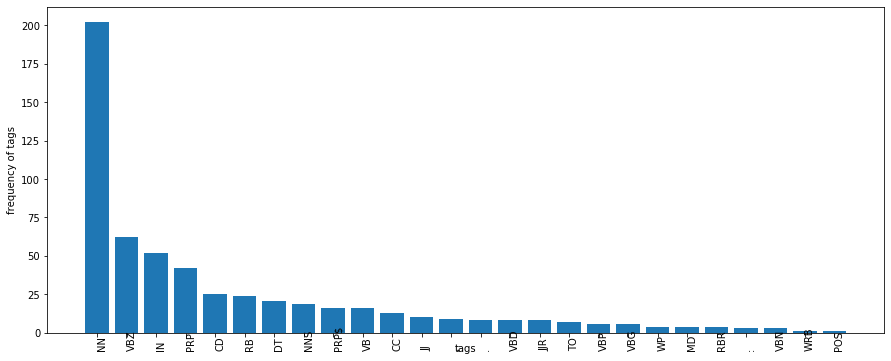

In [42]:
n_tag_stat=get_tagging_statistics(n_text)
plot_text_tagging(n_tag_stat,position=-10)

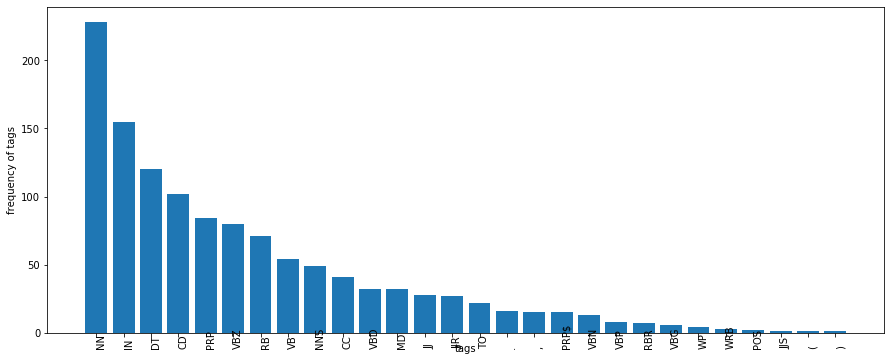

In [43]:
u_tag_stat=get_tagging_statistics(u_text)
plot_text_tagging(u_tag_stat,position=-10)

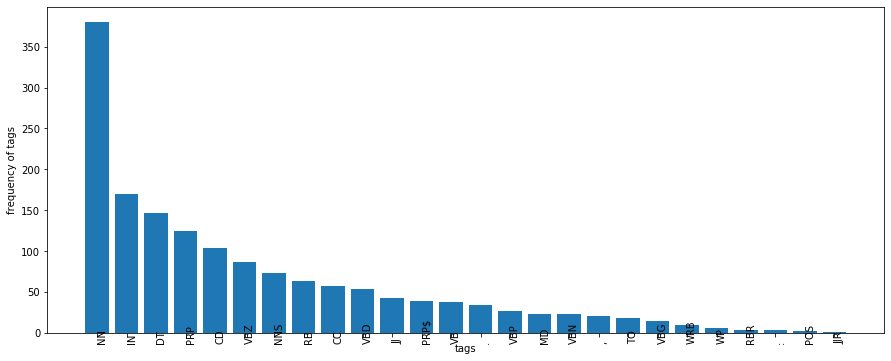

In [44]:
v_tag_stat=get_tagging_statistics(v_text)
plot_text_tagging(v_tag_stat,position=-10)